<a href="https://colab.research.google.com/github/kaindoh/Hypothyroid/blob/master/Nairobi_Hospital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing libaries
import pandas as pd
import numpy as np
import seaborn as sns
import graphviz
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,robust_scale,minmax_scale
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,export_graphviz
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,AdaBoostClassifier,AdaBoostRegressor,gradient_boosting
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,r2_score,precision_score,recall_score,f1_score

In [24]:
# Loading hypothyroid dataset
df = pd.read_csv("hypothyroid.csv")
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [25]:
# checking the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
status                       3163 non-null object
age                          3163 non-null object
sex                          3163 non-null object
on_thyroxine                 3163 non-null object
query_on_thyroxine           3163 non-null object
on_antithyroid_medication    3163 non-null object
thyroid_surgery              3163 non-null object
query_hypothyroid            3163 non-null object
query_hyperthyroid           3163 non-null object
pregnant                     3163 non-null object
sick                         3163 non-null object
tumor                        3163 non-null object
lithium                      3163 non-null object
goitre                       3163 non-null object
TSH_measured                 3163 non-null object
TSH                          3163 non-null object
T3_measured                  3163 non-null object
T3                           3163 non-null 

In [26]:
# Getting the statistical information of the dataset
df.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


In [27]:
# Getting the data types of the columns
df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [28]:
# Getting unique values for categorical columns
columns = df.columns
for i in columns:
  print(i)
  print(df[i].unique())
  print("******************")
  print("\n")

status
['hypothyroid' 'negative']
******************


age
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
******************


sex
['M' 'F' '?']
******************


on_thyroxine
['f' 't']
******************


query_on_thyroxine
['f' 't']
******************


on_antithyroid_medication
['f' 't']
******************


thyroid_surgery
['f' 't']
******************


query_hypothyroid
['f' 't']
******************


query_hyperthyroid
['f' 't']
******************


pregnant
['f' 't']
******************


sick
['f' 't']
******************


tumor
['f' 't']
******************


lithiu

In [29]:
# Due to the excistence of ?  we shall replace it with null values
df = df.replace("?",np.nan)
df.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [30]:
# Getting the column names of dataset
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [31]:
# changing the the data types of the dataset
cat =['status','sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured','T4U_measured','FTI_measured','TBG_measured']
for i in df.columns:
  if i in cat:
    df[i] =df[i].astype('category')
  else:
    df[i] = pd.to_numeric(df[i])
df.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

In [32]:
# Dealing with missing values
# For age and sex, i will fill with most common age and sex respectively which use of mode
df['age'] = df['age'].fillna(df['age'].mode()[0])

df['sex'] = df['sex'].fillna(df['sex'].mode()[0])
df.isnull().sum()

status                          0
age                             0
sex                             0
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [33]:
# checking where the null values lie based on whether they were measured or not

measured = ['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured']
unit = ['TSH','T3','TT4','T4U','FTI','TBG']

for i,j in zip(measured,unit): 
  print(df.groupby(i)[j].mean())

TSH_measured
n        NaN
y    5.92318
Name: TSH, dtype: float64
T3_measured
n         NaN
y    1.939749
Name: T3, dtype: float64
TT4_measured
n       NaN
y    108.85
Name: TT4, dtype: float64
T4U_measured
n         NaN
y    0.978199
Name: T4U, dtype: float64
FTI_measured
n           NaN
y    115.397771
Name: FTI, dtype: float64
TBG_measured
n          NaN
y    31.283077
Name: TBG, dtype: float64


We discover that the null values lie when there was no specific measurement at a particular test hence we fill the null values with zero

In [0]:
# Filling the null values with 0 when measurement was no

measured = ['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured']
unit = ['TSH','T3','TT4','T4U','FTI','TBG']

def filling_func(col):
  measured = col[1]
  unit = col[0]
  if pd.isnull(unit):
    if(measured=='n'):
      return 0
  else:
    return unit


In [0]:
# Application of the functions

for i,j in zip(measured,unit):
  df[j] = df[[i,j]].apply(filling_func,axis=1)

In [36]:
# Checking whether all values are well taken care of

df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [37]:
# Checking for duplicates
df.duplicated().any()

True

In [38]:
# Dropping the duplicates

df.drop_duplicates(inplace=True)


# Checking that the duplicates have actualy been dropped

df.duplicated().any()

False

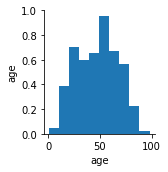

In [39]:
# Getting the relationship between the variables

sns.pairplot(df)

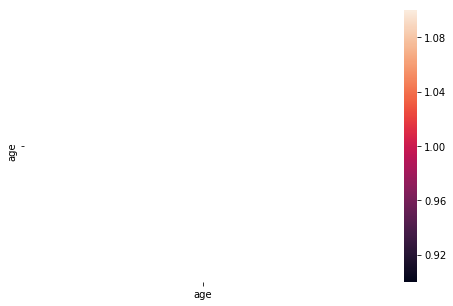

In [40]:
# Getting the relationship between variables in numeric values using a heatmap


# Correlation heatmap of the numerical variables 
corr  =df.corr()

plt.figure(figsize = (8,5))
heatmap = np.zeros_like(df.corr(), dtype=np.bool)
heatmap[np.triu_indices_from(heatmap)] = True
sns.heatmap(df.corr(), annot=True, mask=heatmap)
plt.show()


It can be seen that there is high correlation between T4U and TBG

Also there is very high correlation between TBG and T3


TypeError: ignored

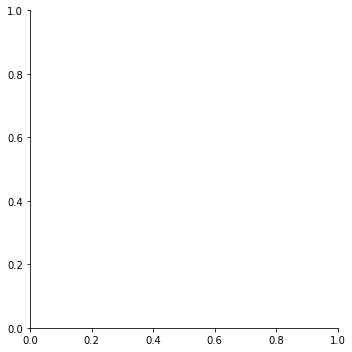

In [41]:
# Visualizing the relationship between T4U and TBG
sns.lmplot(x='T4U',y='TBG',hue='status',data=df,palette=dict(hypothyroid='yellow',negative='green'),fit_reg=False)
plt.title("Scatter of T4U against TBG",color="green",fontsize=15)
plt.xlabel("Scatter of T4U" ,fontsize=15)
plt.ylabel("Scatter of TBG" ,fontsize=15)
plt.show()

In [0]:
# Visualizing the relationship between TBG and T3
sns.lmplot(x='T3',y='TBG',hue='status',data=df,palette=dict(hypothyroid='yellow',negative='green'),fit_reg=False)
plt.title("Scatter of T3 against TBG",color="green",fontsize=15)
plt.xlabel("Scatter of T3" ,fontsize=15)
plt.ylabel("Scatter of TBG" ,fontsize=15)
plt.show()

In [0]:
# Visualizing the target variable
target  = df.groupby('status')['status'].count()
sns.barplot(target.index,target.values)
plt.show()